<div style="text-align: right"> 06.12.2019</div>

***Name: Ole Böttger*** 

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
Auf Blatt 6 haben Sie die Pendelgleichungen (1 + 2) numerisch integriert. Der Code dafür steht in der folgenden Zelle. Führen Sie diesen aus, bevor Sie bei "2. Energie" weiterarbeiten. Hier haben wir $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Die Länge des Pendels ist $L=1$, die Masse $m=1$ und $g$ die Erdbeschleunigung.  


In [1]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
resultsw = [0] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit, damit phi nicht mit dem aktualisierten omega berechnet wird
    w = w - g/L*np.sin(phi)*dt # update omage
    resultsw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    resultsphi.append(phi) # speichere phi

## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [2]:
listepot = [] # leere Liste für Epot
for i in range(len(resultsphi)): # Schleife
    Epot = m * g * L * (1-np.cos(resultsphi[i])) # Formel für Epot mit Einsetzen der Listenelemente aus resultsphi
    listepot.append(Epot) # liste erweitern
    

listekin = [] # leere Liste für Ekin
for i in range(len(resultsw)): # Schleife
    Ekin = m/2 * L**2 * (resultsw[i])**2 # Formel für Ekin mit Einsetzen der Listenelemente aus resultsw
    listekin.append(Ekin) # liste erweitern
    
listeges = [] # leere Liste für Eges
for i in range(len(resultsphi)): # Schleife (braucht man eigentlich nicht)
    Eges = m * g * L * (1-np.cos(np.pi/4)) # Formel für Eges
    listeges.append(Eges) # liste erweitern

**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

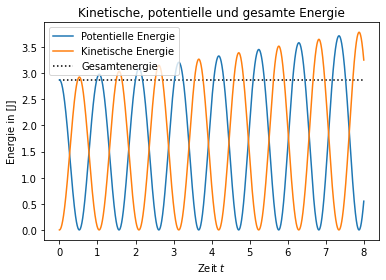

In [4]:
import matplotlib.pyplot as plt # Bibliothek import

phi0 = np.pi/4 # Anfangswert fpr phi
Eges = m * g * L * (1-np.cos(phi0)) # def. Eges

fig, ax = plt.subplots() 

ax.set_title("Kinetische, potentielle und gesamte Energie") # Titel
ax.plot(t, listepot, label='Potentielle Energie') # Graph
ax.plot(t, listekin, label='Kinetische Energie') # Graph
ax.hlines(Eges, 0, 8, label ='Gesamtenergie', color='black', linestyle='dotted') # Linie für Eges
ax.set_xlabel("Zeit $t$") # x-Achse
ax.set_ylabel("Energie in [J]") # y-Achse
plt.legend(loc='best') # Legende

plt.show()

Theoretisch dürften die kinetische Energie und die potentielle Energie nie größer werden als die Gesamtenergie (Energieerhaltungssatz). Allerdings zeigt selbst das händische nachrechnen mit einzelnen Werten der Listen resultsphi und resultsw mit den gegebenen Formeln, dass die vom Programm ausgegebenen Werte stimmen.

Vom Prinzip her entsprechen die Graphen der Erwartung. Ist $E_pot$ minimal, ist $E_kin$ maximal und umgekehrt, und für sehr kurze Zeiten sind die Energien auch noch kleiner als die Gesamtenergie. Darüber hinaus geht keine Energie verloren und es entstehen keine negative Energie.

Ein möglicher Erklärungsansatz für diese Abweichung ist, dass die Einträge der Listen *resultsphi* und *resultsw* nur numerische Näherungen sind. Wie bereits in Aufgabe 6 gesehen, schwingen die numerisch berechneten Pendel langsamer als die analytisch Bestimmten. So "entsteht" die zusätzliche Energie in den Rechnungen.